<a href="https://colab.research.google.com/github/NatanXimenes/Projeto-regressao-com-multiplos-modelos/blob/main/regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto - Regressão
OBJETIVO: O objetivo aqui é fazer uma breve exploração dos dados para entende-lo e posteriormente buscar o melhor modelo de machine learning para prever o a variável MEDV: valor médio das casas, auxiliado pela biblioteca lazypredict e avaliando sua performace por métricas de regressão.


### 1.1. Conjunto de dados
O conjunto de dados que utilizaremos contém informações sobre diferentes tipos de casas na cidade americana de Boston. Este conjunto de dados foi disponilizado no repositório de Aprendizado de Máquina da UCI, contudo o conjunto de dados foi obtido no link do kaglge: [housing.csv](https://www.kaggle.com/schirmerchad/bostonhoustingmlnd).

Existem 506 amostras e 13 variáveis (colunas) neste conjunto de dados. O objetivo é prever o valor dos preços de casas usando estas variáveis.

#### 1.2. Descrição do dados

No conjunto de dados, encontraremos as seguintes variáveis:
- CRIM: Taxa de criminalidade per capita no bairro
- ZN: Proporção de terrenos residenciais com lotes com mais de 25.000 m2 no bairro
- INDUS: Proporção de acres comerciais não comerciais na cidade
- CHAS: Variável fictícia Charles River (1 se o terreno é limitado por rio; 0 caso contrário)
- NOX: Concentração de óxido nítrico (partes por 10 milhões) na cidade
- RM: Número médio de quartos por moradia no bairro
- AGE: Proporção de unidades ocupadas em propriedades construídas antes de 1940
- DIS: Distâncias ponderadas para cinco centros de emprego em Boston
- RAD: Índice de acessibilidade às rodovias
- TAX: Taxa de imposto sobre a propriedade de valor total (x10.000)
- PTRATIO: Proporcaoo de alunos por professor no bairro
- LSTAT: Porcentagem da população considerada classe baixa no bairro
- MEDV: Valor médio das casas ocupadas pelos proprietários (x1000)

A nossa variável alvo (que queremos prever) é a MEDV, ou seja, o valor médio das casas. Devemos encontrar um algoritmo que receba as 12 variáveis restantes e preveja o valor de MEDV. É o problema clássico de **regressão**.

## 2. Análise Exploratória de Dados

- Importando as bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### 2.1. Obtendo os dados

In [ ]:
df = pd.read_csv('/content/houses.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
df.shape

(506, 13)

### 2.2. Limpeza e organização dos dados

In [ ]:
pd.isnull(df).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### 2.3. Exploração e visualização em busca de padrões ou tendências.

Vamos continuar a AED, extraindo vários parâmetros estatísticos do conjunto de dados.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


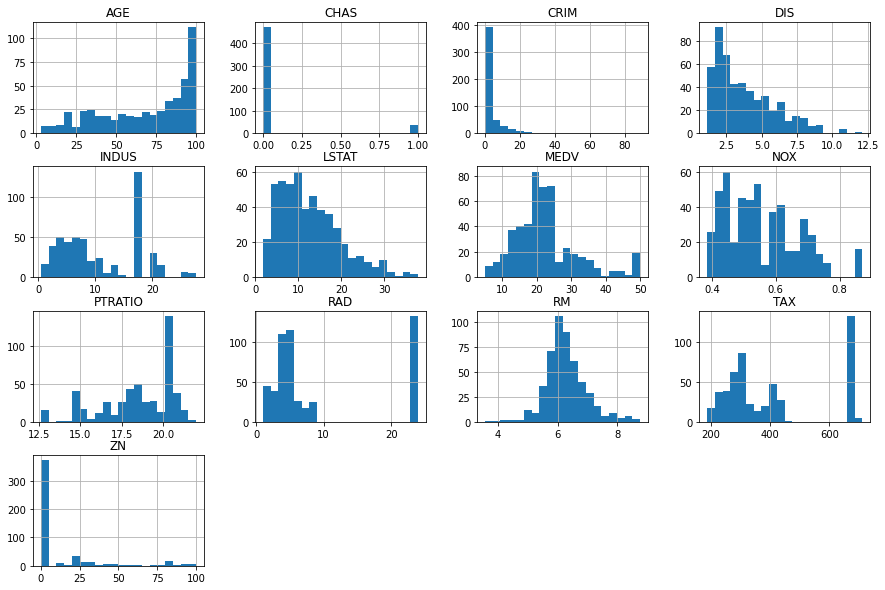

In [ ]:
df.hist(figsize=(15,10),bins=20)
df.describe()

Vamos verificar o relacionamento de algumas variáveis preditoras com a variável alvo (MEDV). Neste caso, vamos utilizar 'RM', 'LSTAT', 'PTRATIO'.
Plotando a relação das variáveis 'RM', 'LSTAT', 'PTRATIO' com  a variável alvo.

In [ ]:
sns.set_theme(style="white")

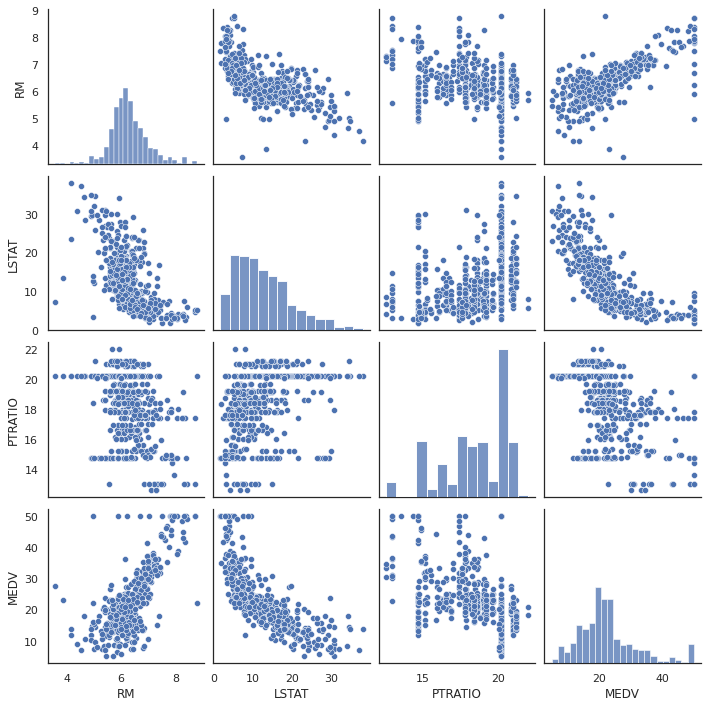

In [ ]:
sns.pairplot(df[['RM','LSTAT','PTRATIO','MEDV']])

- Nota-se que existe uma relação positiva entre a quantidade de quartos e o valor das casas. Quanto mais quartos, maior é o valor da casa.

- Agora a variável 'LSTAT' e 'MEDV' parece que ocorre o inverso. Quanto maior a quantidade de pessoas consideradas classe baixa no bairro, menor é o valor dos imóveis. Indicando que a casa está em um bairro mais pobre da cidade.

- **Correlação entre as variáveis**

<Figure size 1440x720 with 0 Axes>

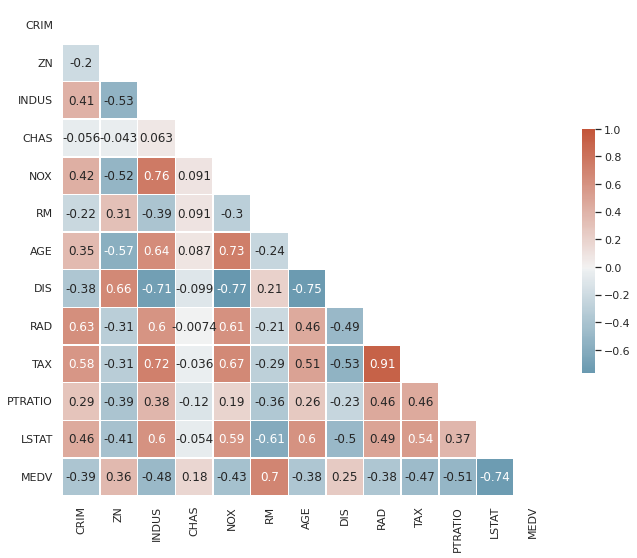

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,10))

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Vamos analisar melhor a relação das variáveis LSTAT e RM com MEDV:

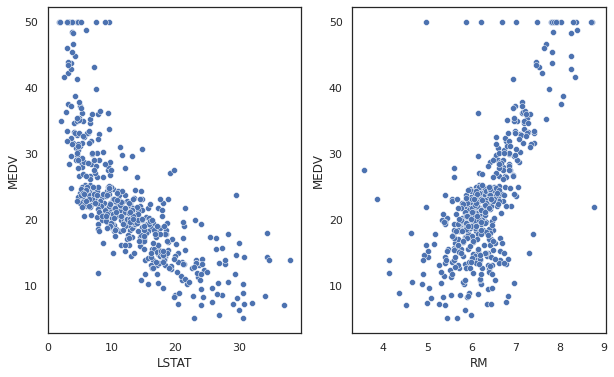

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
sns.scatterplot(ax=axes[0], x='LSTAT',y='MEDV', data=df)
sns.scatterplot(ax=axes[1], x='RM',y='MEDV', data=df)

- Os preços aumentam à medida que o valor de RM aumenta linearmente. Existem poucos valores discrepantes e os dados parecem estar limitados a 50.
- Os preços tendem a diminuir com o aumento do LSTAT. Embora não pareça seguir exatamente uma linha linear.

Vamos analisar a distribuição da variável alvo MEDV:

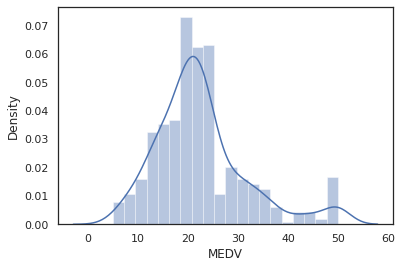

In [ ]:
sns.distplot(df.MEDV,bins=20)

Podemos verificar que a variável alvo possui um distribuição próxima a uma normal. Contudo, podemos notar a presenção de alguns outliers em torno de 50.

A verdade é que nem chegamos perto compreender totalmente o conjunto de dados. O que é normal, pois estamos querendo em entender o processo e não em exaurir o assunto. Como a inteção aqui é aplicar e testar modelos para aprendizado, vamos deixar de lidar com oos outliers.

### 2.4 Aplicar modelos

Após realizar uma investigação superficial*, vamos prosseguir separando nossos dados de treino e teste. Logo após, vamos treinar nossos modelos.

**Separando a base de dados em treino e teste:**

In [ ]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=4)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 12) (354,)
(152, 12) (152,)


##ESCOLHENDO OS MELHORES MODELOS COM O USO DO LAZYPREDICT

In [ ]:
#pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:09<00:00,  4.23it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.88       0.89  3.39        0.43
LGBMRegressor                                0.87       0.88  3.54        0.40
HistGradientBoostingRegressor                0.87       0.88  3.54        3.32
GradientBoostingRegressor                    0.82       0.84  4.12        0.20
RandomForestRegressor                        0.82       0.83  4.21        0.67
XGBRegressor                                 0.81       0.83  4.22        0.74
BaggingRegressor                             0.79       0.81  4.45        0.08
AdaBoostRegressor                            0.77       0.79  4.67        0.20
KNeighborsRegressor                          0.77       0.78  4.74        0.05
PoissonRegressor                             0.75       0.77  4.92        0.04
ExtraTreeRegressor                           0.70   

In [ ]:
models.head(15)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.88,0.89,3.39,0.43
LGBMRegressor,0.87,0.88,3.54,0.40
HistGradientBoostingRegressor,0.87,0.88,3.54,3.32
GradientBoostingRegressor,0.82,0.84,4.12,0.20
RandomForestRegressor,0.82,0.83,4.21,0.67
XGBRegressor,0.81,0.83,4.22,0.74
BaggingRegressor,0.79,0.81,4.45,0.08
AdaBoostRegressor,0.77,0.79,4.67,0.20
KNeighborsRegressor,0.77,0.78,4.74,0.05


##APLICANDO ALGUNS MODELOS E AVALIANDO SUA PERFORMACE

##HistGradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
GBR = HistGradientBoostingRegressor()
GBR.fit(X_train, y_train)
GBR.score(X, y)

0.9324736017500186

In [ ]:
y_pred_GBR = GBR.predict(X_train)

# **treino**

In [ ]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred_GBR))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_GBR))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_GBR))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_GBR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_GBR)))

R^2: 0.9631119672930897
Adjusted R^2: 0.9618138547051632
MAE: 1.03310295808443
MSE: 2.77659282647074
RMSE: 1.6663111433555078


# **teste**

In [ ]:
y_test_pred_GBR = GBR.predict(X_test)

In [ ]:
acc_rf = metrics.r2_score(y_test, y_test_pred_GBR)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_GBR))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_GBR))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_GBR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_GBR)))

R^2: 0.8801926935324524
Adjusted R^2: 0.8698496167151102
MAE: 2.2815103086533073
MSE: 12.510287601235788
RMSE: 3.5369884932292033


##CROSS-VALIDATION NO TREINO E TESTE

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_train = cross_val_score(GBR, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
#treino
from numpy import mean
from numpy import absolute
print(scores_train)
print(mean(absolute(scores_train)))

[-2.93804076 -2.40030573 -2.40690579 -3.34105959 -2.56952168 -2.03913986
 -3.01669712 -2.33960799 -2.53260476 -2.31568413]
2.589956739694234


In [ ]:
scores_test = cross_val_score(GBR, X_test, y_test_pred_GBR, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
#teste
print(scores_test)
print(mean(absolute(scores_test)))

[-1.77077559 -2.14418847 -1.54652791 -2.09120933 -1.96038267 -1.49888967
 -1.41865478 -1.54102862 -1.67508593 -1.34270215]
1.698944511617157


pode-se notar uma variação no scoring tanto nos dados de teste e treino

##RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X,y)

0.9252160687867899

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred_rf))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_rf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

R^2: 0.8330026295485427
Adjusted R^2: 0.8185855903728773
MAE: 2.5159539473684203
MSE: 17.43787749342106
RMSE: 4.175868471757828


##ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
etr.score(X,y)

0.9570529732933033

In [ ]:
y_pred_etr = etr.predict(X_test)

In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred_etr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_etr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_etr))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_etr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_etr)))

R^2: 0.8844156310741043
Adjusted R^2: 0.8744371244042427
MAE: 2.1943552631578926
MSE: 12.069328157894732
RMSE: 3.474093861411164


##LinearRegression --**COMPARAÇÃO: Pessimo desempenho comparado aos modelos anteriores**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X,y)

0.7285982785407938

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred_lr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_lr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

R^2: 0.7073118203603466
Adjusted R^2: 0.6820437760749088
MAE: 3.9454423316781218
MSE: 30.56252087401745
RMSE: 5.52833798478507


## 3. Conclusão
Assim como previsto pelo lazypredict, o melhor modelo a ser utilizado para prever o preço das casas é o ExtraTreesRegressor, podemos melhorar ainda mais seu desempenho tunando seus hiperparametros com uso do random ou grid search, outra alternativa seria preparar melhor os dados, o que não foi o foco nesse projeto.